In [41]:


import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report

# Multiclass classification algorithms; expansion of logistic, The target variable is "categorical" with more than 2 possible values


PROJECT_ROOT = Path.cwd().parent
RAW_DATA_DIR = PROJECT_ROOT / 'data' / 'raw'
RAW_DATA_DIR.mkdir(parents=True, exist_ok=True)

csv_path = RAW_DATA_DIR / 'aastho-classes.csv' # synth data
df_raw = pd.read_csv(csv_path)

df = df_raw.copy()

# A decision tree is an abstract structure with multiple decision taking steps. It can be represented by a flowchart with conditional nodes.

In [42]:
df = (df.drop(columns = ['Unnamed: 0', 'GI'])).copy()

df


,P10,P40,P200,LL,PL,Group
0,72.70,59.05,3.28,0.00,0.00,A-3
1,73.34,64.12,5.86,0.00,0.00,A-3
2,94.53,60.71,48.76,24.96,20.27,A-4
3,71.30,48.90,32.29,41.49,21.58,A-2-7
4,66.71,51.89,30.00,26.65,8.00,A-2-6
...,...,...,...,...,...,...
2495,39.16,29.24,7.20,25.72,25.56,A-1-a
2496,84.37,81.28,60.06,50.32,38.02,A-7-5
2497,77.06,71.39,46.96,51.94,6.09,A-7-6
2498,65.06,30.20,16.71,0.00,0.00,A-1-b


<Axes: >

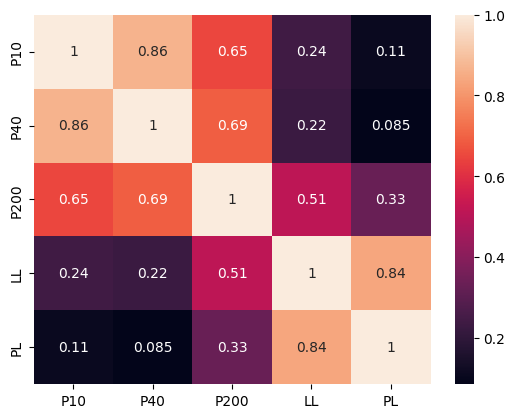

In [43]:
#correlation_matrix = df.loc[:, df.columns[:-1]].corr() # removing the last 'categorical'
corr_mat = df.corr(numeric_only=True, method='pearson')

sns.heatmap(corr_mat, annot = True)

In [44]:
column_names = df.columns

target = 'Group'
features = column_names[column_names != target]

X = df[features] # feature vectors
y = df[target] # target (groups)

# value counts = frequency table (x | f)
#display(y.value_counts())

# 20% of the data to be used for testing
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size = 0.2,
  stratify = y # IMPORTANT: ALL CASES SHOULD BE INCLUDED
)

print(f"Training Set: {len(y_train)}/{len(df)}")
display(y_train.value_counts())

print(f"Testing Set: {len(y_test)}/{len(df)}")
display(y_test.value_counts())


Training Set: 2000/2500


Group
A-2-6    193
A-3      178
A-1-a    174
A-5      173
A-2-4    168
A-6      163
A-7-5    162
A-7-6    162
A-4      160
A-2-7    159
A-2-5    159
A-1-b    149
Name: count, dtype: int64

Testing Set: 500/2500


Group
A-2-6    48
A-1-a    44
A-3      44
A-5      43
A-2-4    42
A-6      41
A-7-6    41
A-7-5    41
A-2-5    40
A-4      40
A-2-7    39
A-1-b    37
Name: count, dtype: int64

In [45]:
# the model literally does it as tree, so we visualize as such

# visualize trained decision tree
# trained_tree = pipe.named_steps['classifier']

classifier = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

# classifier.predict(X) -> y (1 class) -> (class3)
# classifier.predict_proba(X) ->
# [P(class1), P(class2), P(class3)..., P(class12)]

plt.figure(figsize = (256, 48))

plot_tree(
  classifier,
  fontsize = 12,
  feature_names = df.columns,
  class_names = y_test.unique(),
  proportion = True
)

plt.show()

In [46]:
score = classifier.score(X_test, y_test)

print(f'Mean Accuracy (Average of predicted == actual) = {score:.3f}')

predicted_liquefied = classifier.predict(X_test)

report = classification_report(y_test, predicted_liquefied)

print(report)

real_data = y_test
predicted_data = predicted_liquefied

number_of_mismatches = (real_data != predicted_data).sum()

# Test the mean accuracy
mean_accuracy = 1 - number_of_mismatches / len(y_test)

print(f"Mean Accuracy = {score:.2f} | Computed = {mean_accuracy:.2f}")

Mean Accuracy (Average of predicted == actual) = 0.976
              precision    recall  f1-score   support

       A-1-a       1.00      1.00      1.00        44
       A-1-b       1.00      1.00      1.00        37
       A-2-4       0.97      0.93      0.95        42
       A-2-5       0.93      0.93      0.93        40
       A-2-6       0.94      0.98      0.96        48
       A-2-7       0.92      0.92      0.92        39
         A-3       1.00      1.00      1.00        44
         A-4       1.00      1.00      1.00        40
         A-5       0.98      0.98      0.98        43
         A-6       1.00      1.00      1.00        41
       A-7-5       0.98      0.98      0.98        41
       A-7-6       1.00      1.00      1.00        41

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500

Mean Accuracy = 0.98 | Computed = 0.98


In [ ]:
sample_rows = X_test[:1]
# TODO: calculate probabilities of X being in each groups
probabilities = classifier.predict_proba(sample_rows) # 12 probabilities

display(probabilities)
# highest value of probailities -> correspond to predicted class

predicted_class = classifier.predict(sample_rows)
display(predicted_class)

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

array(['A-2-5'], dtype=object)